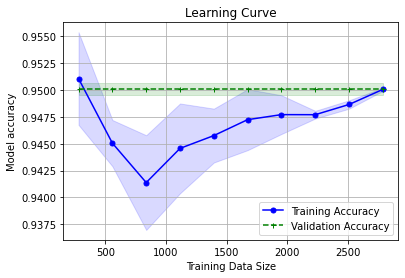

The accuracy is:  95.05016722408027 %
Execution time in seconds: 0.11508893966674805
The accuracy is:  95.05016722408027 %


In [14]:
import numpy as np
import pandas as pd
import statistics as s
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)
#print(data.isna().sum())
#print(data.info())

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))


#establishing the training set and the test set
x=data.drop(["stroke"],axis=1)
y=data["stroke"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape

'''
#k=np.arange(1,6)
k = [0.1, 1, 10]
train_score, test_score = validation_curve(SVC(), x_train, y_train, param_name='gamma', param_range=k, scoring="accuracy",cv=5)
plt.plot(k, train_score.mean(axis=1),marker='o', markersize=5,color='blue', label='Training Accuracy')
plt.plot(k, test_score.mean(axis=1),marker='o', markersize=5,color='green', label='Validation Accuracy')
plt.xlabel('Gamma')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
'''
#learning curve
train_size, train_score2, test_score2=learning_curve(SVC(kernel='rbf',C=0.1), x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy",cv=5)
train_mean = np.mean(train_score2, axis=1)
test_mean = np.mean(test_score2, axis=1)
train_std = np.std(train_score2, axis=1)
test_std = np.std(test_score2, axis=1)
plt.plot(train_size, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_size, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


import time
startTime = time.time()
##SVM rbf
dt = SVC(kernel="rbf",random_state=42).fit(x_train,y_train)

#Evaluate the accuracy of the model
y_pred = dt.predict(x_test)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

##SVM poly
dt = SVC(kernel="poly",random_state=42).fit(x_train,y_train)

#Evaluate the accuracy of the model
y_pred = dt.predict(x_test)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
